In [1]:
# Install necessary libraries
!pip install tomotopy
!pip install little_mallet_wrapper

# Import libraries
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy
import os
import pandas as pd
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load Spacy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Import libraries
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import tomotopy as tp



/Users/macbook/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1]:
import os
from bs4 import BeautifulSoup
from datetime import datetime

def extract_publish_dates_huffpost(folder_path):
    publish_dates = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.html'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                soup = BeautifulSoup(file, 'html.parser')
                publish_date_tags = soup.find_all('time', {'datetime': True})
                for publish_date_tag in publish_date_tags:
                    publish_date_str = publish_date_tag['datetime']
                    try:
                        publish_date = datetime.strptime(publish_date_str, '%Y-%m-%dT%H:%M:%S%z')
                        publish_dates.append(publish_date)
                    except ValueError:
                        print(publish_date_str)
    return publish_dates


folder_path_huffpost = "/Users/macbook/Downloads/Thesis/Dataset/Huffpost"
publish_dates_huffpost = extract_publish_dates_huffpost(folder_path_huffpost)




2024-02-24T04:32:28.000Z
2024-03-07T14:01:15.000Z
2024-03-08T04:25:43.000Z
2024-03-22T20:29:19.000Z
2024-03-29T17:51:44.000Z
2024-03-03T16:11:52.000Z
2024-02-29T16:45:04.000Z
2024-03-21T18:57:58.000Z
2024-04-05T13:25:34.000Z
2024-04-03T16:28:37.000Z
2024-04-03T15:57:57.000Z
2024-03-20T04:12:07.000Z
2024-03-03T14:14:09.000Z
2024-03-08T18:13:37.000Z
2024-04-09T12:18:25.000Z
2024-03-05T13:06:57.000Z
2024-03-05T13:17:06.000Z
2024-04-09T12:52:09.000Z
2024-03-21T15:30:46.000Z
2024-03-08T18:38:09.000Z
2024-04-01T18:42:19.000Z
2024-03-01T16:14:44.000Z
2024-03-01T13:16:42.000Z
2024-04-11T13:06:08.000Z


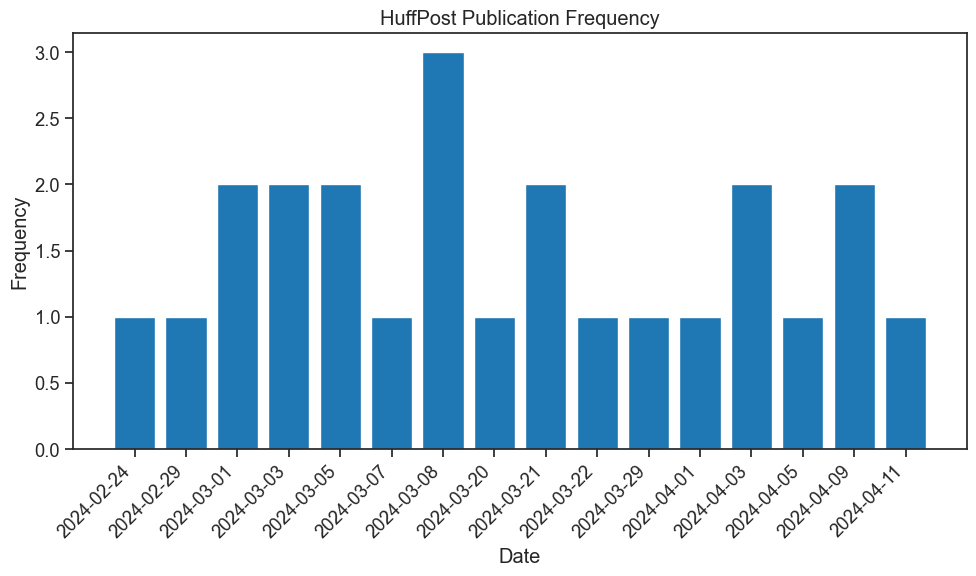

In [13]:
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# Example list of date strings
date_strings = [
    'February 24 2024',
    'March 07 2024',
    'March 08 2024',
    'March 22 2024',
    'March 29 2024',
    'March 03 2024',
    'February 29 2024',
    'March 21 2024',
    'April 05 2024',
    'April 03 2024',
    'April 03 2024',
    'March 20 2024',
    'March 03 2024',
    'March 08 2024',
    'April 09 2024',
    'March 05 2024',
    'March 05 2024',
    'April 09 2024',
    'March 21 2024',
    'March 08 2024',
    'April 01 2024',
    'March 01 2024',
    'March 01 2024',
    'April 11 2024'
]

# Count occurrences of each date
date_counter = Counter(date_strings)

# Separate dates and frequencies
dates, frequencies = zip(*date_counter.items())

# Sort the dates and convert to "Year-Month-Day" format
sorted_dates = sorted(dates, key=lambda x: datetime.strptime(x, '%B %d %Y'))
sorted_dates_formatted = [datetime.strptime(date, '%B %d %Y').strftime('%Y-%m-%d') for date in sorted_dates]
sorted_frequencies = [date_counter[date] for date in sorted_dates]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_dates_formatted, sorted_frequencies, color='#1f77b4')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('HuffPost Publication Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as JPG
plt.savefig('Huffton_Post_Frequency.jpg')

plt.show()


In [23]:
# Update the stopwords list
extra_stopwords = {'ad', 'story', 'said', 'nt','u', 'et','advertisement', 'daily', 'tag'}
stop_words = set(stopwords.words('english'))
stop_words.update(extra_stopwords)

# Define function to read text data
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

# Define text preprocessing function
def preprocess_text(text):
    # Remove special characters and punctuation
    clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    clean_text = clean_text.lower()
    # Tokenize the text
    tokens = word_tokenize(clean_text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Use Spacy for POS tagging and named entity recognition
    doc = nlp(" ".join(filtered_tokens))
    # Remove person names and geopolitical entities
    filtered_tokens = [token.text for token in doc if token.ent_type_ not in {'PERSON', 'GPE'}]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Return the preprocessed text
    return lemmatized_tokens

# Specify the folder containing text files
txt_folder = "/Users/macbook/Downloads/Thesis/Dataset/Huffpost  txt"
txt_files = [os.path.join(txt_folder, file) for file in os.listdir(txt_folder) if file.endswith(".txt")]

# Preprocess the text data
training_data = []
for file_path in txt_files:
    text = read_text(file_path)
    processed_text = preprocess_text(text)
    training_data.append(" ".join(processed_text))




In [77]:
# Define the number of topics
num_topics = 5

# Create an LDA model
lda_model = tp.LDAModel(k=num_topics)

# Add the preprocessed data to the LDA model
for text in training_data:
    lda_model.add_doc(text.split())

# Train the model
lda_model.train(0)
num_iters = 28
for i in range(num_iters):
    lda_model.train(1)
    print('Iteration: {:d} Log-likelihood: {:.3f}'.format(i, lda_model.ll_per_word))


Iteration: 0 Log-likelihood: -9.890
Iteration: 1 Log-likelihood: -9.582
Iteration: 2 Log-likelihood: -9.383
Iteration: 3 Log-likelihood: -9.275
Iteration: 4 Log-likelihood: -9.187
Iteration: 5 Log-likelihood: -9.123
Iteration: 6 Log-likelihood: -9.066
Iteration: 7 Log-likelihood: -9.022
Iteration: 8 Log-likelihood: -8.995
Iteration: 9 Log-likelihood: -8.941
Iteration: 10 Log-likelihood: -8.914
Iteration: 11 Log-likelihood: -8.894
Iteration: 12 Log-likelihood: -8.883
Iteration: 13 Log-likelihood: -8.871
Iteration: 14 Log-likelihood: -8.858
Iteration: 15 Log-likelihood: -8.848
Iteration: 16 Log-likelihood: -8.827
Iteration: 17 Log-likelihood: -8.822
Iteration: 18 Log-likelihood: -8.811
Iteration: 19 Log-likelihood: -8.800
Iteration: 20 Log-likelihood: -8.800
Iteration: 21 Log-likelihood: -8.795
Iteration: 22 Log-likelihood: -8.793
Iteration: 23 Log-likelihood: -8.790
Iteration: 24 Log-likelihood: -8.784
Iteration: 25 Log-likelihood: -8.771
Iteration: 26 Log-likelihood: -8.761
Iteration: 

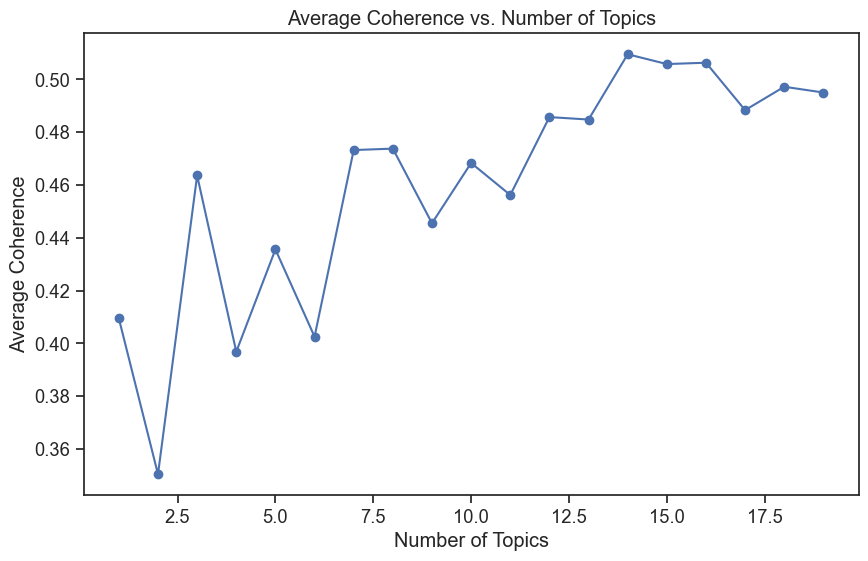

In [78]:
import matplotlib.pyplot as plt

def plot_coherence(num_topics_range, coherence_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_range, coherence_scores, marker='o', linestyle='-')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.show()
    
# Initialize lists to store coherence scores
coherence_scores = []

# Iterate over different number of topics 
for num_topics in range(1, 20, 1):
    # Create a new LDA model
    new_lda_model = tp.LDAModel(k=num_topics)
    for text in training_data:
        new_lda_model.add_doc(text.split())

    # Train the new model
    new_lda_model.train(0) 
    num_iters = 10
    for i in range(num_iters):
        new_lda_model.train(1)

    # Calculate coherence score for the new model
    coh = tp.coherence.Coherence(new_lda_model, coherence='c_v')
    average_coherence = coh.get_score()
    coherence_scores.append(average_coherence)

# Plot the coherence scores
plot_coherence(range(1, 20), coherence_scores)


In [79]:
# Function to print the top words for each topic
def print_top_words(model, num_words=10):
    print("\nTopic Model Results:\n")
    for i in range(model.k):
        print(f"Topic {i + 1}: ", end='')
        topic_words = ' '.join(word for word, _ in model.get_topic_words(i, top_n=num_words) if word not in stop_words)

        print(topic_words)
        print()

# Print the top words for each topic
print_top_words(lda_model, num_words=10)


Topic Model Results:

Topic 1: border like year time election case last new day

Topic 2: migrant trump say former border kelly need news made

Topic 3: republican people country bill house speech american senate state back

Topic 4: biden president campaign also program immigrant illegal parole could

Topic 5: immigration border law court would state federal police right



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/macbook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/xf/6ycp67hx6cn7njl4kht95x5r0000gn/T/ipykernel_80804/1018517656.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


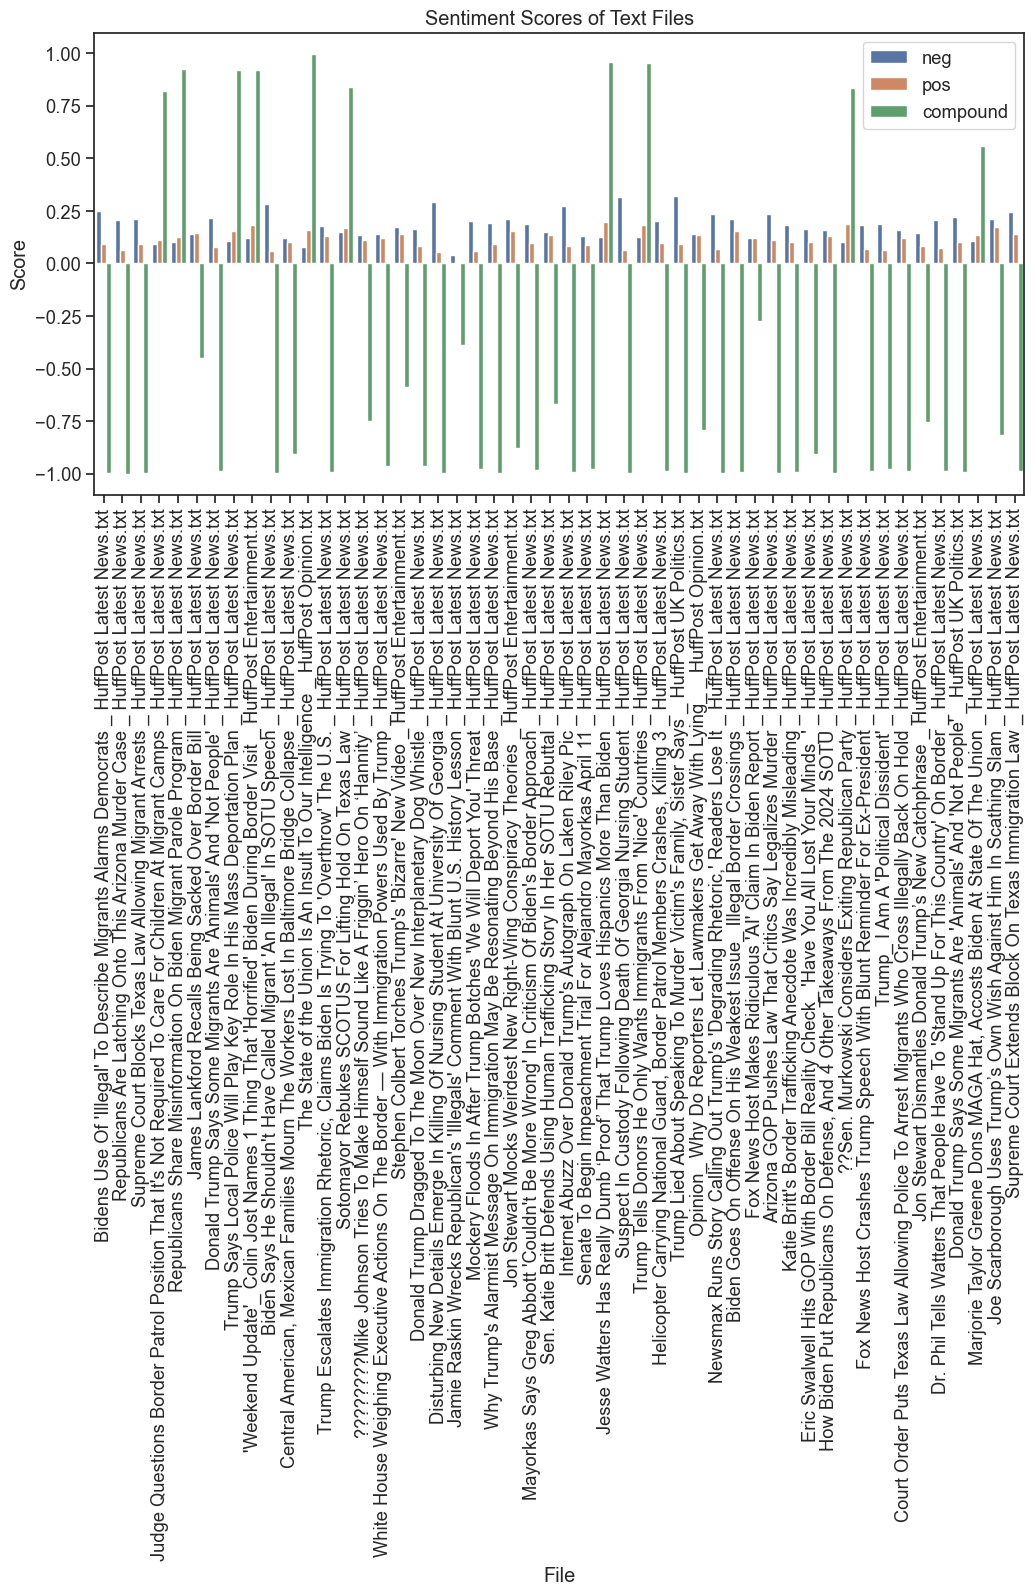

In [86]:
import os
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary nltk data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load Spacy model
nlp = spacy.load('en_core_web_sm')


# Define function to read text data
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text


# Specify folder path containing text files
txt_folder = "/Users/macbook/Downloads/Thesis/Dataset/Huffpost  txt"
txt_files = [os.path.join(txt_folder, file) for file in os.listdir(txt_folder) if file.endswith(".txt")]

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Preprocess text data and perform sentiment analysis
results = []
for file_path in txt_files:
    text = read_text(file_path)
    processed_text = preprocess_text(text)
    sentiment_scores = sia.polarity_scores(processed_text)
    sentiment_scores['file'] = os.path.basename(file_path)
    results.append(sentiment_scores)

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(results)

# Visualize sentiment scores
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars='file', value_vars=['neg', 'pos', 'compound'], var_name='Sentiment', value_name='Score')
sns.barplot(data=df_melted, x='file', y='Score', hue='Sentiment')
plt.xticks(rotation=90)
plt.title('Sentiment Scores of Text Files')
plt.xlabel('File')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [87]:

positive_documents = df[df['compound'] > 0.05]['file'].tolist()
print("compound score > 0.05 ：")
for document in positive_documents:
    print(document)


compound score > 0.05 ：
Judge Questions Border Patrol Position That It's Not Required To Care For Children At Migrant Camps _ HuffPost Latest News.txt
Republicans Share Misinformation On Biden Migrant Parole Program _ HuffPost Latest News.txt
Trump Says Local Police Will Play Key Role In His Mass Deportation Plan _ HuffPost Latest News.txt
'Weekend Update'_ Colin Jost Names 1 Thing That 'Horrified' Biden During Border Visit _ HuffPost Entertainment.txt
The State of the Union Is An Insult To Our Intelligence _ HuffPost Opinion.txt
Sotomayor Rebukes SCOTUS For Lifting Hold On Texas Law _ HuffPost Latest News.txt
Jesse Watters Has Really Dumb ‘Proof’ That Trump Loves Hispanics More Than Biden _ HuffPost Latest News.txt
Trump Tells Donors He Only Wants Immigrants From 'Nice' Countries _ HuffPost Latest News.txt
??Sen. Murkowski Considers Exiting Republican Party _ HuffPost Latest News.txt
Marjorie Taylor Greene Dons MAGA Hat, Accosts Biden At State Of The Union _ HuffPost Latest News.txt


In [90]:
import os
from collections import defaultdict
from urllib.parse import urlparse
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Folder path
folder_path = "/Users/macbook/Downloads/Thesis/Dataset/Huffpost"

# Dictionary to store references and sentiment scores for each domain
domain_data = defaultdict(lambda: {"references": 0, "sentiments": []})

# Function to extract domain from URL
def extract_domain(url):
    try:
        parsed_url = urlparse(url)
        return parsed_url.netloc
    except Exception as e:
        print(f"Error parsing URL {url}: {e}")
        return None

# Traverse the folder for HTML files
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".html"):
            file_path = os.path.join(root, file)
            try:
                with open(file_path, "r", encoding="utf-8") as f:
                    html_content = f.read()
                   
            except UnicodeDecodeError:
                print("Could not decode file with UTF-8:", file_path)
                continue

            # Parse HTML with BeautifulSoup
            soup = BeautifulSoup(html_content, "html.parser")
            
            # Analyze sentiment of the entire HTML content
            sentiment_score = sia.polarity_scores(html_content)["compound"]
            
            # Find all external links and update the domain data
            for a_tag in soup.find_all("a", href=True):
                link = a_tag["href"]
                if not link.startswith("#") and not link.startswith("/") and not link.startswith("mailto:"):
                    domain = extract_domain(link)
                    if domain:
                        domain_data[domain]["references"] += 1
                        domain_data[domain]["sentiments"].append(sentiment_score)

# Print the results
if domain_data:
    print("Media References:")
    for domain, data in domain_data.items():
        total_references = data["references"]
        average_sentiment = sum(data["sentiments"]) / len(data["sentiments"]) if data["sentiments"] else 0
        print(f"Domain: {domain}")
        print(f"Total References: {total_references}")
        print(f"Average Sentiment: {average_sentiment:.2f}")
        print("---")
else:
    print("No external links found.")


Could not decode file with UTF-8: /Users/macbook/Downloads/Thesis/Dataset/Huffpost/Fox News Host Crashes Trump Speech With Blunt Reminder For Ex-President _ HuffPost Latest News_files/bridge3.634(1).0_en.html
Media References:
Domain: www.huffpost.com
Total References: 13829
Average Sentiment: 0.26
---
Domain: www.huffingtonpost.co.uk
Total References: 588
Average Sentiment: -0.89
---
Domain: www.huffingtonpost.es
Total References: 48
Average Sentiment: 0.25
---
Domain: www.huffingtonpost.fr
Total References: 48
Average Sentiment: 0.25
---
Domain: www.huffingtonpost.gr
Total References: 48
Average Sentiment: 0.25
---
Domain: www.huffingtonpost.it
Total References: 48
Average Sentiment: 0.25
---
Domain: www.huffingtonpost.jp
Total References: 48
Average Sentiment: 0.25
---
Domain: www.huffingtonpost.kr
Total References: 48
Average Sentiment: 0.25
---
Domain: www.facebook.com
Total References: 51
Average Sentiment: 0.21
---
Domain: www.twitter.com
Total References: 78
Average Sentiment: 

/var/folders/xf/6ycp67hx6cn7njl4kht95x5r0000gn/T/ipykernel_80804/1762401338.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(domains, rotation=90)


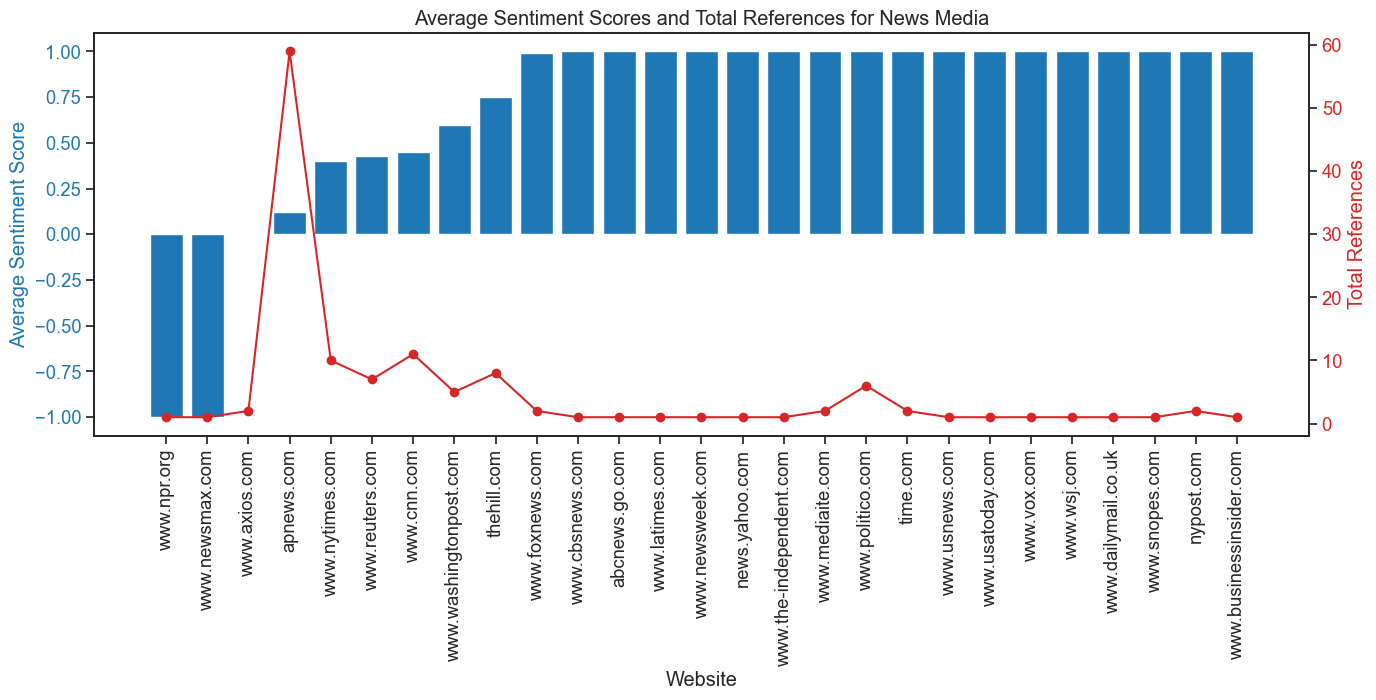

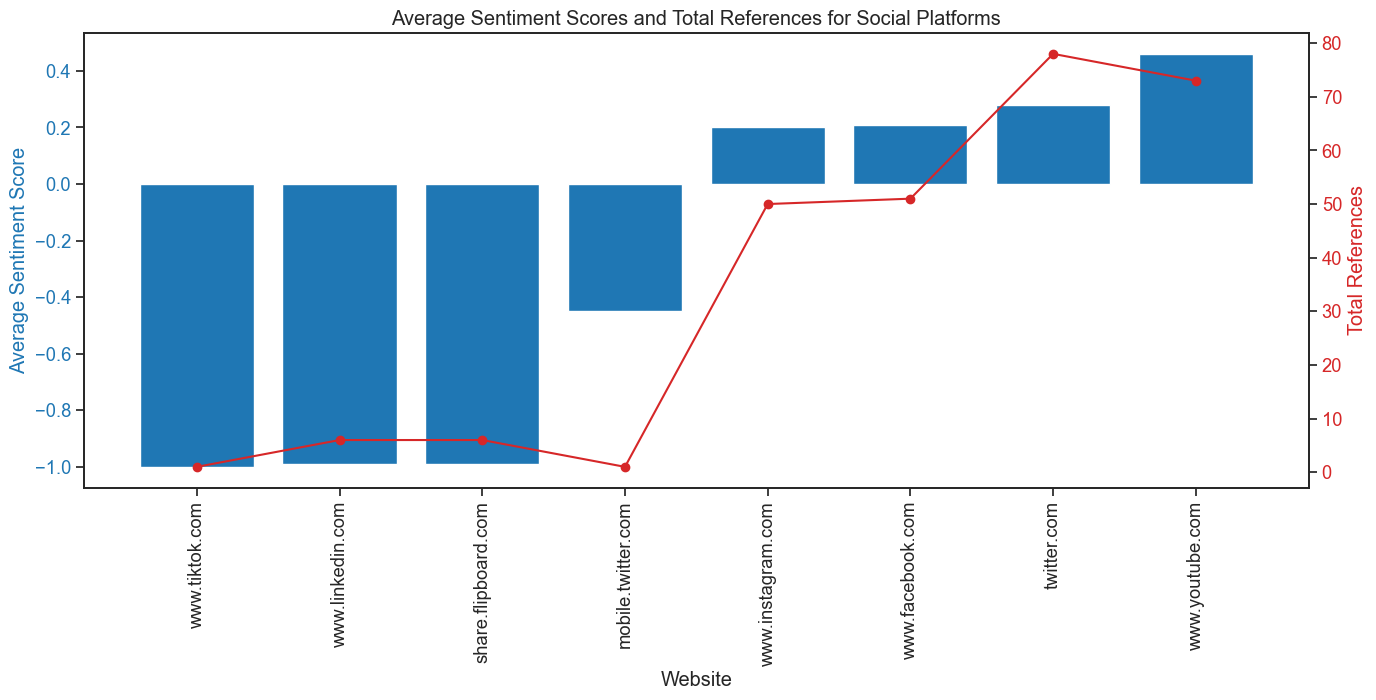

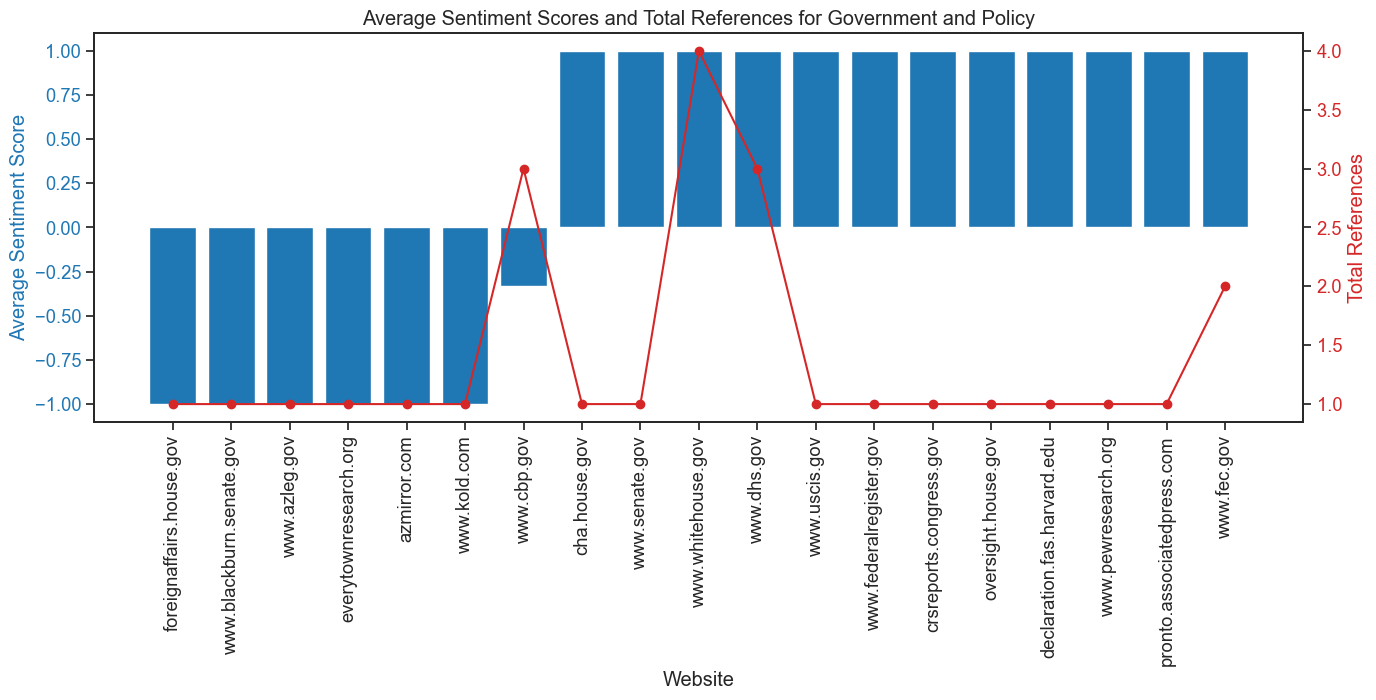

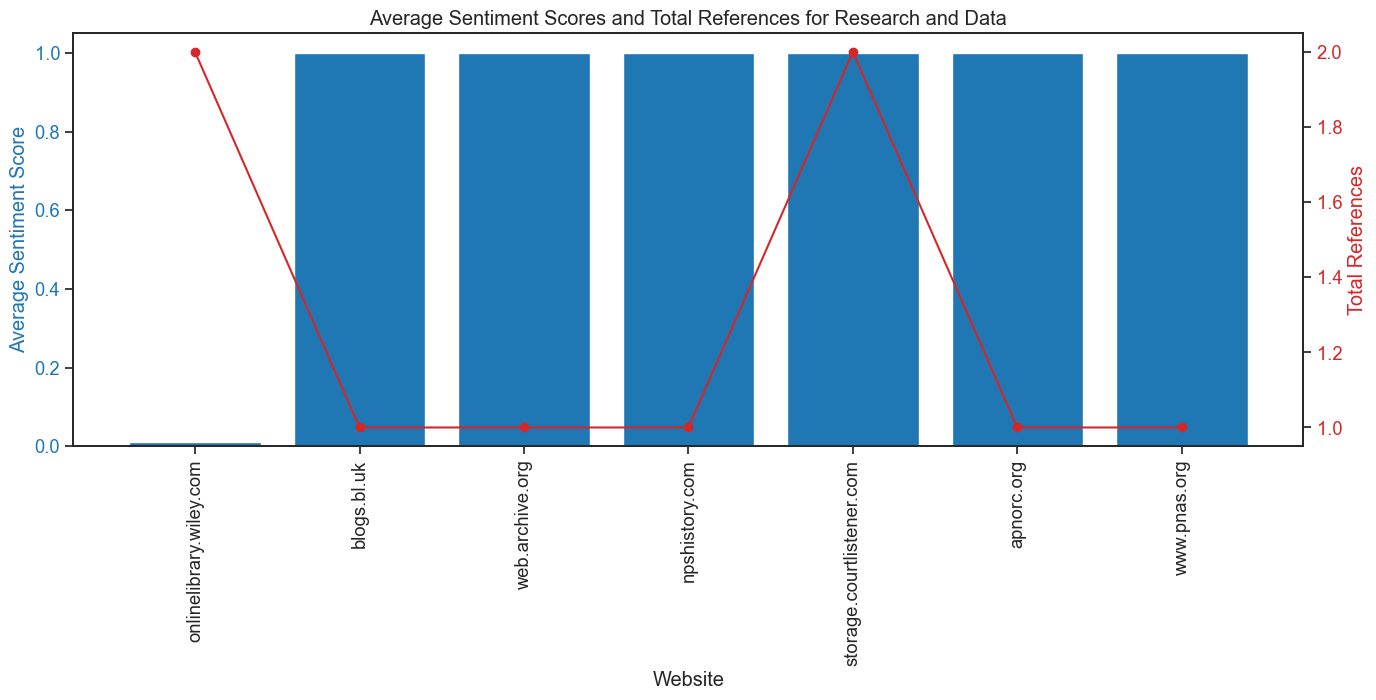

<Figure size 640x480 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt

# Data definition
data = {
    "News Media": {
        "www.cbsnews.com": {"sentiment": 1.00, "references": 1},
        "abcnews.go.com": {"sentiment": 1.00, "references": 1},
        "www.latimes.com": {"sentiment": 1.00, "references": 1},
        "www.newsweek.com": {"sentiment": 1.00, "references": 1},
        "thehill.com": {"sentiment": 0.75, "references": 8},
        "news.yahoo.com": {"sentiment": 1.00, "references": 1},
        "www.the-independent.com": {"sentiment": 1.00, "references": 1},
        "www.mediaite.com": {"sentiment": 1.00, "references": 2},
        "www.axios.com": {"sentiment": 0.00, "references": 2},
        "apnews.com": {"sentiment": 0.12, "references": 59},
        "www.politico.com": {"sentiment": 1.00, "references": 6},
        "time.com": {"sentiment": 1.00, "references": 2},
        "www.usnews.com": {"sentiment": 1.00, "references": 1},
        "www.nytimes.com": {"sentiment": 0.40, "references": 10},
        "www.npr.org": {"sentiment": -1.00, "references": 1},
        "www.washingtonpost.com": {"sentiment": 0.60, "references": 5},
        "www.reuters.com": {"sentiment": 0.43, "references": 7},
        "www.usatoday.com": {"sentiment": 1.00, "references": 1},
        "www.vox.com": {"sentiment": 1.00, "references": 1},
        "www.wsj.com": {"sentiment": 1.00, "references": 1},
        "www.dailymail.co.uk": {"sentiment": 1.00, "references": 1},
        "www.snopes.com": {"sentiment": 1.00, "references": 1},
        "www.cnn.com": {"sentiment": 0.45, "references": 11},
        "www.foxnews.com": {"sentiment": 0.99, "references": 2},
        "nypost.com": {"sentiment": 1.00, "references": 2},
        "www.businessinsider.com": {"sentiment": 1.00, "references": 1},
        "www.newsmax.com": {"sentiment": -1.00, "references": 1},
    },
    "Social Platforms": {
        "www.facebook.com": {"sentiment": 0.21, "references": 51},
        "twitter.com": {"sentiment": 0.28, "references": 78},
        "www.instagram.com": {"sentiment": 0.20, "references": 50},
        "www.linkedin.com": {"sentiment": -0.99, "references": 6},
        "www.youtube.com": {"sentiment": 0.46, "references": 73},
        "share.flipboard.com": {"sentiment": -0.99, "references": 6},
        "mobile.twitter.com": {"sentiment": -0.45, "references": 1},
        "www.tiktok.com": {"sentiment": -1.00, "references": 1},
    },
    "Government and Policy": {
        "cha.house.gov": {"sentiment": 1.00, "references": 1},
        "www.senate.gov": {"sentiment": 1.00, "references": 1},
        "www.whitehouse.gov": {"sentiment": 1.00, "references": 4},
        "www.dhs.gov": {"sentiment": 1.00, "references": 3},
        "www.cbp.gov": {"sentiment": -0.33, "references": 3},
        "www.uscis.gov": {"sentiment": 1.00, "references": 1},
        "www.federalregister.gov": {"sentiment": 1.00, "references": 1},
        "crsreports.congress.gov": {"sentiment": 1.00, "references": 1},
        "foreignaffairs.house.gov": {"sentiment": -1.00, "references": 1},
        "www.blackburn.senate.gov": {"sentiment": -1.00, "references": 1},
        "oversight.house.gov": {"sentiment": 1.00, "references": 1},
        "declaration.fas.harvard.edu": {"sentiment": 1.00, "references": 1},
        "www.pewresearch.org": {"sentiment": 1.00, "references": 1},
        "pronto.associatedpress.com": {"sentiment": 1.00, "references": 1},
        "www.fec.gov": {"sentiment": 1.00, "references": 2},
        "www.azleg.gov": {"sentiment": -1.00, "references": 1},
        "everytownresearch.org": {"sentiment": -1.00, "references": 1},
        "azmirror.com": {"sentiment": -1.00, "references": 1},
        "www.kold.com": {"sentiment": -1.00, "references": 1},
    },
    "Research and Data": {
        "blogs.bl.uk": {"sentiment": 1.00, "references": 1},
        "web.archive.org": {"sentiment": 1.00, "references": 1},
        "onlinelibrary.wiley.com": {"sentiment": 0.01, "references": 2},
        "npshistory.com": {"sentiment": 1.00, "references": 1},
        "storage.courtlistener.com": {"sentiment": 1.00, "references": 2},
        "apnorc.org": {"sentiment": 1.00, "references": 1},
        "www.pnas.org": {"sentiment": 1.00, "references": 1},
    }
}

# Function to plot sentiment and references
def plot_sentiment_and_references(data, category_name):
    category_data = data[category_name]
    domains = list(category_data.keys())
    sentiments = [category_data[domain]["sentiment"] for domain in domains]
    references = [category_data[domain]["references"] for domain in domains]
    
    # Sort by sentiment score
    sorted_indices = sorted(range(len(sentiments)), key=lambda k: sentiments[k])
    domains = [domains[i] for i in sorted_indices]
    sentiments = [sentiments[i] for i in sorted_indices]
    references = [references[i] for i in sorted_indices]
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    color = 'tab:blue'
    ax1.set_xlabel('Website')
    ax1.set_ylabel('Average Sentiment Score', color=color)
    ax1.bar(domains, sentiments, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(domains, rotation=90)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Total References', color=color)
    ax2.plot(domains, references, color=color, marker='o')
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    plt.title(f'Average Sentiment Scores and Total References for {category_name}')
    plt.show()
# Plot for each category
# Plot for each category
for category in data:
    plot_sentiment_and_references(data, category)

plt.savefig('plot.jpg', dpi=150, bbox_inches='tight')
plt.show()





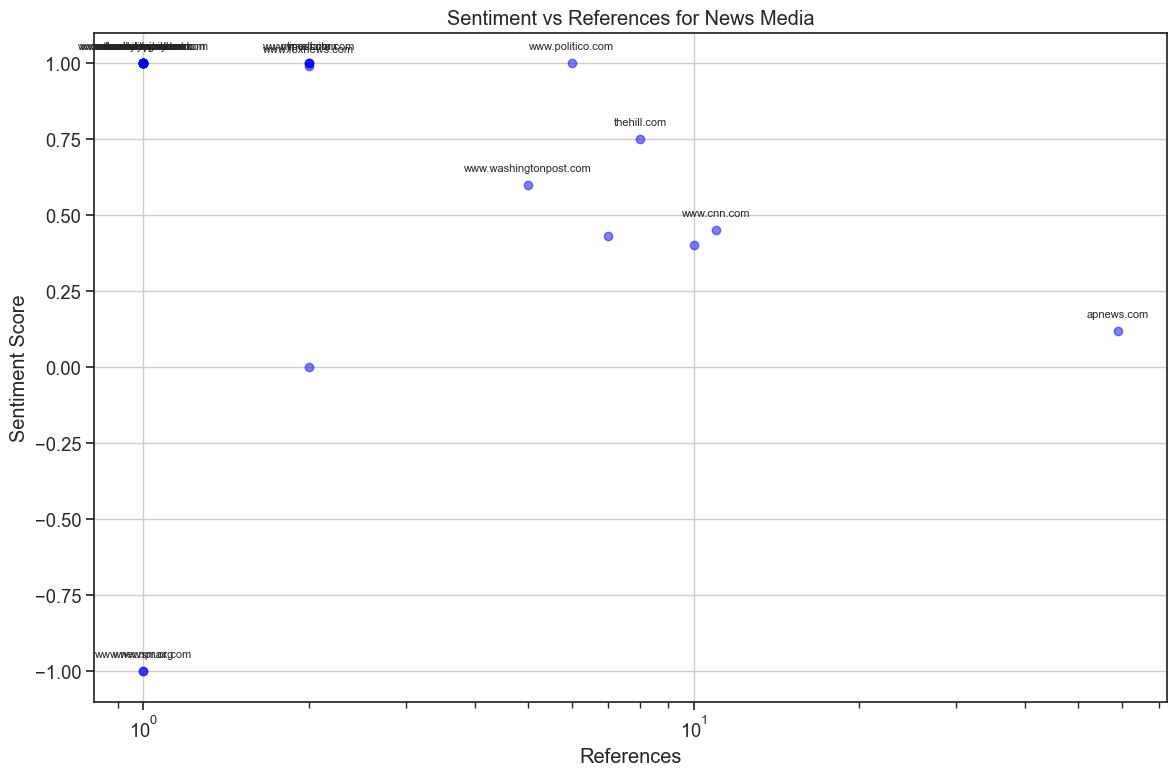

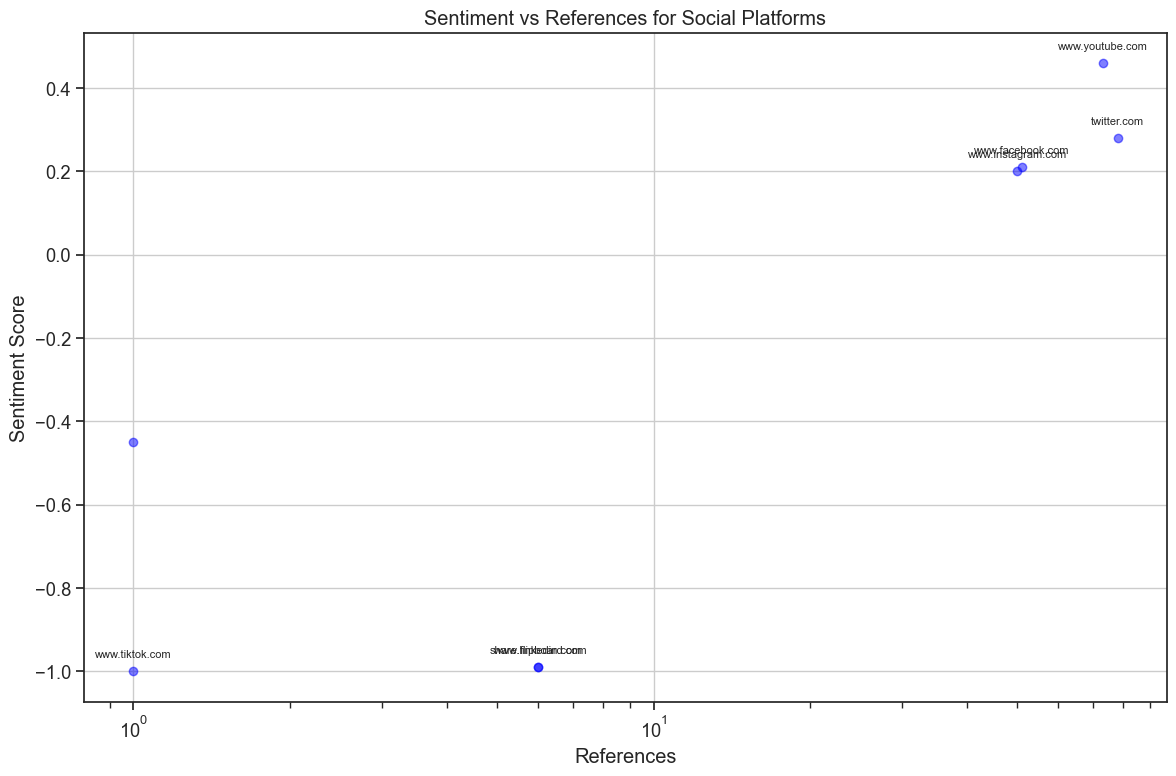

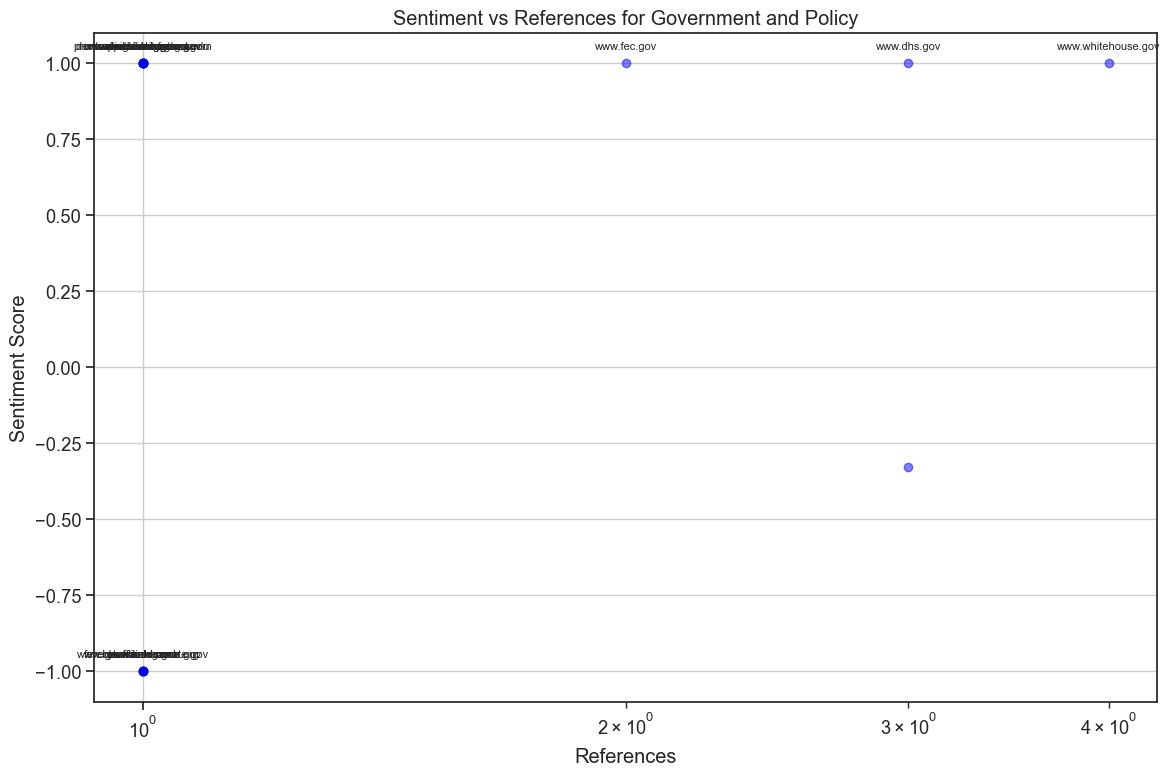

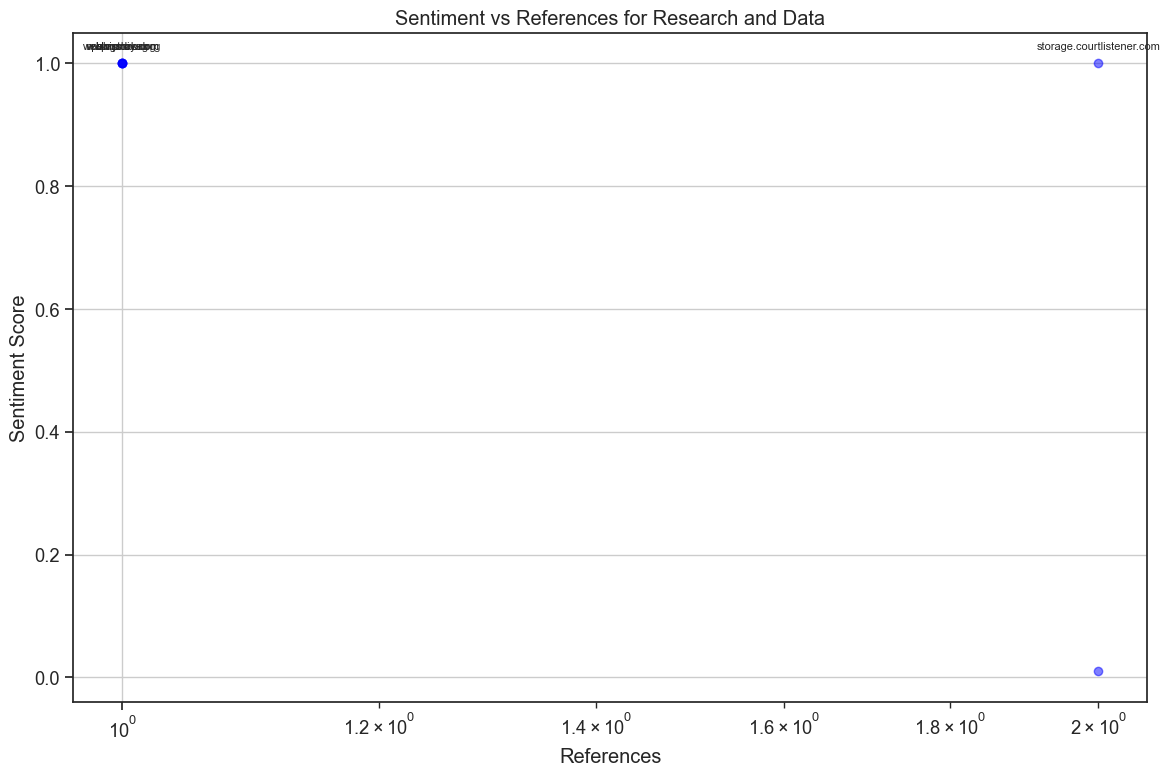

In [104]:
import matplotlib.pyplot as plt

# Data definition
data = {
    "News Media": {
        "www.cbsnews.com": {"sentiment": 1.00, "references": 1},
        "abcnews.go.com": {"sentiment": 1.00, "references": 1},
        "www.latimes.com": {"sentiment": 1.00, "references": 1},
        "www.newsweek.com": {"sentiment": 1.00, "references": 1},
        "thehill.com": {"sentiment": 0.75, "references": 8},
        "news.yahoo.com": {"sentiment": 1.00, "references": 1},
        "www.the-independent.com": {"sentiment": 1.00, "references": 1},
        "www.mediaite.com": {"sentiment": 1.00, "references": 2},
        "www.axios.com": {"sentiment": 0.00, "references": 2},
        "apnews.com": {"sentiment": 0.12, "references": 59},
        "www.politico.com": {"sentiment": 1.00, "references": 6},
        "time.com": {"sentiment": 1.00, "references": 2},
        "www.usnews.com": {"sentiment": 1.00, "references": 1},
        "www.nytimes.com": {"sentiment": 0.40, "references": 10},
        "www.npr.org": {"sentiment": -1.00, "references": 1},
        "www.washingtonpost.com": {"sentiment": 0.60, "references": 5},
        "www.reuters.com": {"sentiment": 0.43, "references": 7},
        "www.usatoday.com": {"sentiment": 1.00, "references": 1},
        "www.vox.com": {"sentiment": 1.00, "references": 1},
        "www.wsj.com": {"sentiment": 1.00, "references": 1},
        "www.dailymail.co.uk": {"sentiment": 1.00, "references": 1},
        "www.snopes.com": {"sentiment": 1.00, "references": 1},
        "www.cnn.com": {"sentiment": 0.45, "references": 11},
        "www.foxnews.com": {"sentiment": 0.99, "references": 2},
        "nypost.com": {"sentiment": 1.00, "references": 2},
        "www.businessinsider.com": {"sentiment": 1.00, "references": 1},
        "www.newsmax.com": {"sentiment": -1.00, "references": 1},
    },
    "Social Platforms": {
        "www.facebook.com": {"sentiment": 0.21, "references": 51},
        "twitter.com": {"sentiment": 0.28, "references": 78},
        "www.instagram.com": {"sentiment": 0.20, "references": 50},
        "www.linkedin.com": {"sentiment": -0.99, "references": 6},
        "www.youtube.com": {"sentiment": 0.46, "references": 73},
        "share.flipboard.com": {"sentiment": -0.99, "references": 6},
        "mobile.twitter.com": {"sentiment": -0.45, "references": 1},
        "www.tiktok.com": {"sentiment": -1.00, "references": 1},
    },
    "Government and Policy": {
        "cha.house.gov": {"sentiment": 1.00, "references": 1},
        "www.senate.gov": {"sentiment": 1.00, "references": 1},
        "www.whitehouse.gov": {"sentiment": 1.00, "references": 4},
        "www.dhs.gov": {"sentiment": 1.00, "references": 3},
        "www.cbp.gov": {"sentiment": -0.33, "references": 3},
        "www.uscis.gov": {"sentiment": 1.00, "references": 1},
        "www.federalregister.gov": {"sentiment": 1.00, "references": 1},
        "crsreports.congress.gov": {"sentiment": 1.00, "references": 1},
        "foreignaffairs.house.gov": {"sentiment": -1.00, "references": 1},
        "www.blackburn.senate.gov": {"sentiment": -1.00, "references": 1},
        "oversight.house.gov": {"sentiment": 1.00, "references": 1},
        "declaration.fas.harvard.edu": {"sentiment": 1.00, "references": 1},
        "www.pewresearch.org": {"sentiment": 1.00, "references": 1},
        "pronto.associatedpress.com": {"sentiment": 1.00, "references": 1},
        "www.fec.gov": {"sentiment": 1.00, "references": 2},
        "www.azleg.gov": {"sentiment": -1.00, "references": 1},
        "everytownresearch.org": {"sentiment": -1.00, "references": 1},
        "azmirror.com": {"sentiment": -1.00, "references": 1},
        "www.kold.com": {"sentiment": -1.00, "references": 1},
    },
    "Research and Data": {
        "blogs.bl.uk": {"sentiment": 1.00, "references": 1},
        "web.archive.org": {"sentiment": 1.00, "references": 1},
        "onlinelibrary.wiley.com": {"sentiment": 0.01, "references": 2},
        "npshistory.com": {"sentiment": 1.00, "references": 1},
        "storage.courtlistener.com": {"sentiment": 1.00, "references": 2},
        "apnorc.org": {"sentiment": 1.00, "references": 1},
        "www.pnas.org": {"sentiment": 1.00, "references": 1},
    }
}

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Function to plot sentiment and references with selective labeling
import matplotlib.pyplot as plt
import numpy as np

# Function to plot sentiment and references as a scatter plot
def plot_sentiment_and_references(data, category_name):
    category_data = data[category_name]
    domains = list(category_data.keys())
    sentiments = [category_data[domain]["sentiment"] for domain in domains]
    references = [category_data[domain]["references"] for domain in domains]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    scatter = ax.scatter(references, sentiments, color='blue', alpha=0.5)

    # Add labels and title
    ax.set_xlabel('References')
    ax.set_ylabel('Sentiment Score')
    ax.set_title(f'Sentiment vs References for {category_name}')

    # Use a log scale for references if necessary
    ax.set_xscale('log')

    # Annotate the most significant points
    for i, domain in enumerate(domains):
        if references[i] > 10 or abs(sentiments[i]) > 0.5:  # Threshold to reduce clutter
            ax.annotate(domain, (references[i], sentiments[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for each category
for category in data:
    plot_sentiment_and_references(data, category)
